In [1]:
import pandas as pd
import pickle
import time
import os
import re
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from functools import reduce

In [4]:
PATH_TO_DATA_UK = '/media/andrii/earth/Katia/CS_MasterThesis/data/ukwiki/ukwiki_20180920/'
PATH_TO_DATA_EN = '/media/andrii/earth/Katia/CS_MasterThesis/data/enwiki/enwiki_20180920/'
PATH_TO_DATA_RL = '/media/andrii/earth/Katia/CS_MasterThesis/data/ukwiki/uk_red_links/'
PATH_TO_WIKIDATA_UK = '/media/andrii/earth/Katia/CS_MasterThesis/data/ukwiki/uk_wikidata/'
PATH_TO_WIKIDATA_EN = '/media/andrii/earth/Katia/CS_MasterThesis/data/enwiki/en_wikidata/'

In [5]:
candidate_pairs = pd.read_csv(PATH_TO_DATA_RL+'red_links_uk_with_features_with_uniqueid.csv', sep='^')

In [6]:
concur_folders = [f for f in os.listdir(PATH_TO_DATA_RL) if re.match(r'concurrent_scores', f)]

In [7]:
concur_folders

['concurrent_scores_4',
 'concurrent_scores_2',
 'concurrent_scores_3',
 'concurrent_scores']

In [8]:
def files_to_df(path_folder):
    files = os.listdir(path_folder)
    scores_per_folder = []
    for file in files:
        with open(path_folder+file, 'rb') as fp:
            concurrent_scores = pickle.load(fp)
        scores_per_folder += concurrent_scores
    df = pd.DataFrame(scores_per_folder)
    df.columns = ['pair_id', 'concur_score']
    df = df.dropna()
    return df

In [9]:
concurrent_scores_1_df = files_to_df(PATH_TO_DATA_RL+'concurrent_scores/')

In [10]:
concurrent_scores_2_df = files_to_df(PATH_TO_DATA_RL+'concurrent_scores_2/')

In [11]:
concurrent_scores_3_df = files_to_df(PATH_TO_DATA_RL+'concurrent_scores_3/')

In [12]:
concurrent_scores_4_df = files_to_df(PATH_TO_DATA_RL+'concurrent_scores_4/')

In [13]:
dfs = [concurrent_scores_1_df, concurrent_scores_2_df, concurrent_scores_3_df, concurrent_scores_4_df]

In [14]:
concurrent_scores = pd.concat(dfs)

In [15]:
concurrent_scores = concurrent_scores.drop_duplicates().reset_index(drop=True)

In [16]:
concurrent_scores = concurrent_scores.sort_values(by=['pair_id'])

In [17]:
concurrent_scores.shape

(2959153, 2)

In [18]:
concurrent_scores.head()

,pair_id,concur_score
1761889,0,0.03060
1761890,1,0.03053
1761891,2,0.03026
1761892,3,0.03271
1761893,4,0.03297


In [19]:
candidate_pairs.head()

,pair_unique_id,red_link_name,candidate,true_label,BN_results,jaccard_score,levenstein_score
0,0,Pachetra sagittigera,Phytometra viridaria,False,0,0.081,0.650
1,1,Pachetra sagittigera,Conistra rubiginea,False,0,0.076,0.600
2,2,Pachetra sagittigera,Tholera decimalis,False,0,0.068,0.750
3,3,Pachetra sagittigera,Pachetra sagittigera,True,0,0.066,0.000
4,4,Pachetra sagittigera,Hoplodrina octogenaria,False,0,0.066,0.727


In [20]:
features_with_concur_scores =\
    pd.merge(candidate_pairs, concurrent_scores, how='right', left_on=['pair_unique_id'], right_on=['pair_id'])

In [21]:
features_with_concur_scores =\
    features_with_concur_scores[['pair_unique_id', 'red_link_name', 'candidate', 'true_label', 'BN_results',\
                                'jaccard_score', 'levenstein_score', 'concur_score']]

In [22]:
features_with_concur_scores.to_csv(PATH_TO_DATA_RL+'red_links_uk_with_features.csv', sep="^", header=True, index=False)

In [23]:
features_with_concur_scores[features_with_concur_scores['red_link_name']=='Ді (округ)']

,pair_unique_id,red_link_name,candidate,true_label,BN_results,jaccard_score,levenstein_score,concur_score
2959117,2964346,Ді (округ),Vercors Massif,False,0,0.009,0.929,0.00108
2959118,2964347,Ді (округ),Vocontii,False,0,0.009,0.900,0.00174
2959119,2964348,Ді (округ),Velay,False,0,0.009,1.000,0.00158
2959120,2964349,Ді (округ),Roman Catholic Diocese of Valence,False,0,0.009,0.909,0.00053
2959121,2964350,Ді (округ),Maquis du Vercors,False,0,0.009,0.824,0.00104
2959122,2964351,Ді (округ),Vivarais,False,0,0.008,0.800,0.00100
2959123,2964352,Ді (округ),Peter II,False,0,0.008,0.900,0.00000
2959124,2964353,Ді (округ),Goat cheese,False,0,0.008,1.000,0.00051
2959125,2964354,Ді (округ),Wirksworth,False,0,0.008,0.800,0.00000
2959126,2964355,Ді (округ),Cromer,False,0,0.008,0.900,0.00005


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef9f8e9be0>]],
      dtype=object)

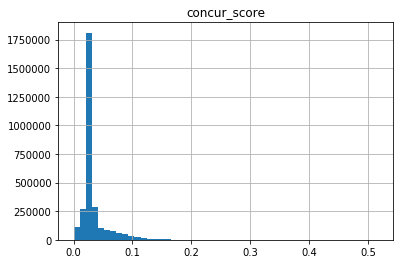

In [24]:
features_with_concur_scores.hist(column='concur_score', bins=50)

In [36]:
score_df = features_with_concur_scores[features_with_concur_scores['concur_score'] > 0.3]
print('Number of items with bigger then 0.3 score is', len(score_df))
print('Number of items with bigger then 0.3 score and still TRUE is', len(score_df[score_df['true_label'] == True]))

Number of items with bigger then 0.3 score is 415
Number of items with bigger then 0.3 score and still TRUE is 8


## Plot relative true distribution

In [26]:
# define number of bins and round its values
bins_j = np.linspace(0,1,100).tolist()
bins_j = list(map(lambda x: round(x, 2), bins_j))

In [27]:
# get number of scores in each bin and indexes of scores in each bin
indexes = [[] for _ in range(len(bins_j)-1)]

for index in range(features_with_concur_scores.shape[0]):
    for b in range(len(bins_j)-1):
        score = features_with_concur_scores['concur_score'][index]
        if score < bins_j[b+1]:
            indexes[b].append(index)
            break

In [28]:
number_of_scores_in_bin = list(map(lambda x: len(x), indexes))

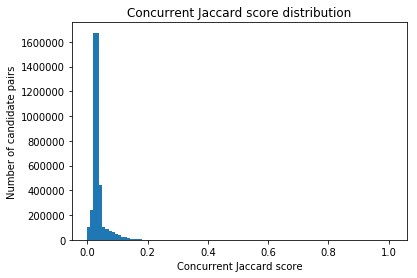

In [29]:
# plot Jaccard score on concurrent links distribution
plt.bar(bins_j[:-1], number_of_scores_in_bin, width=0.02, align='edge')
plt.xlabel('Concurrent Jaccard score')
plt.ylabel('Number of candidate pairs')
plt.title('Concurrent Jaccard score distribution')
plt.show()

In [30]:
# get a number of true values in each bin
trues_all = []
for i in indexes:
    trues = list(map(lambda x: features_with_concur_scores['true_label'][x], i))
    trues_all.append(trues)

truess = list(map(lambda x: x.count(True), trues_all))

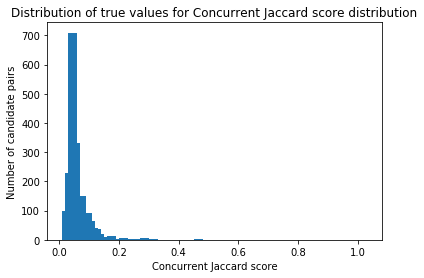

In [31]:
# plot distribution of true values
plt.bar(bins_j[1:], truess, width=0.03, align='edge')
plt.xlabel('Concurrent Jaccard score')
plt.ylabel('Number of candidate pairs')
plt.title('Distribution of true values for Concurrent Jaccard score distribution')
plt.show()

/home/andrii/apps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


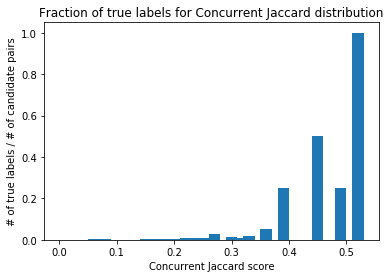

In [32]:
plt.bar(bins_j[:-1], np.array(truess) / np.array(number_of_scores_in_bin), width=0.02, align='edge')
plt.xlabel('Concurrent Jaccard score')
plt.ylabel('# of true labels / # of candidate pairs')
plt.title('Fraction of true labels for Concurrent Jaccard distribution')
plt.show()